## Part B. Curve Fitting

The next set of notebook cells demonstrates how to fit nonlinear curves.

The standard method used for curve fitting is called the method of least squares (https://www.sciencedirect.com/topics/engineering/method-of-least-square) which seeks to find the parameters of our function $f(x)$ that minimizes the sum of squared residuals (SSR):

\begin{equation}
\sum_{i=1}^{n} (y_i - f(x_i))^2
\end{equation}

where $n$ in fitting terminology is the number of data points. A lower SSR implies a better fit.

The default fitting algorithm used by the code below is known as the Levenberg–Marquardt algorithm (https://en.wikipedia.org/wiki/Levenberg–Marquardt_algorithm), a relatively robust fitting method that combines the Gauss–Newton algorithm (https://en.wikipedia.org/wiki/Gauss–Newton_algorithm) with gradient descent. Robust means that, in many cases, it can find a solution even if it starts very far off the final minimum.   

For illustration, we start by defining the important libraries and load our data.

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# use pandas to load the csv file
# change the location depending on where you save the .csv file!
df_boston = pd.read_csv('Boston.csv') ## Boston house prices dataset

# preview the dataset
print(df_boston)

# get our x & y variables
x = df_boston['crim'] ## Per capita crime rate by town
y = df_boston['medv'] ## Median value of owner-occupied homes in $1000’s

# convert x & y into numpy arrays for "easier/simpler" manipulation
x = x.to_numpy()
y = y.to_numpy()

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3





Let's plot the data to see what it looks like.

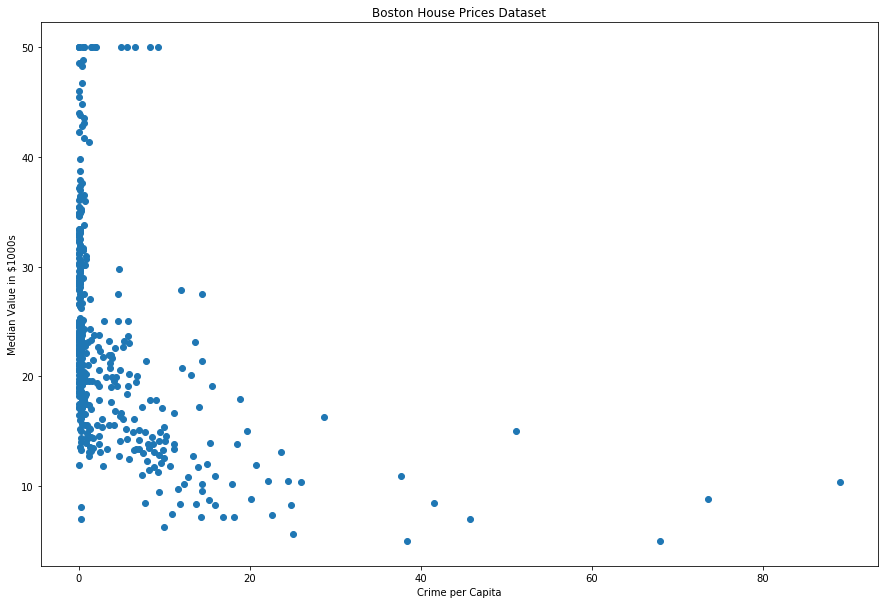

In [2]:
import matplotlib.pyplot as plt

# adjust size of ALL SUCCEEDING plots
plt.rcParams['figure.figsize'] = [15, 10] ## change numbers to make the plots taller/wider

# plot the graph
plt.scatter(x, y) ## plot the data as points (there are other ways to do this)
plt.title("Boston House Prices Dataset")
plt.xlabel('Crime per Capita')
plt.ylabel('Median Value in $1000s')
plt.show()

<div class="alert alert-block alert-info">

**Alternative CP**: Answer a survey!

</div>

### Linear Fitting

m = -0.4151902790826474
b = 24.033106174796064
SSR: 36275.51235627509


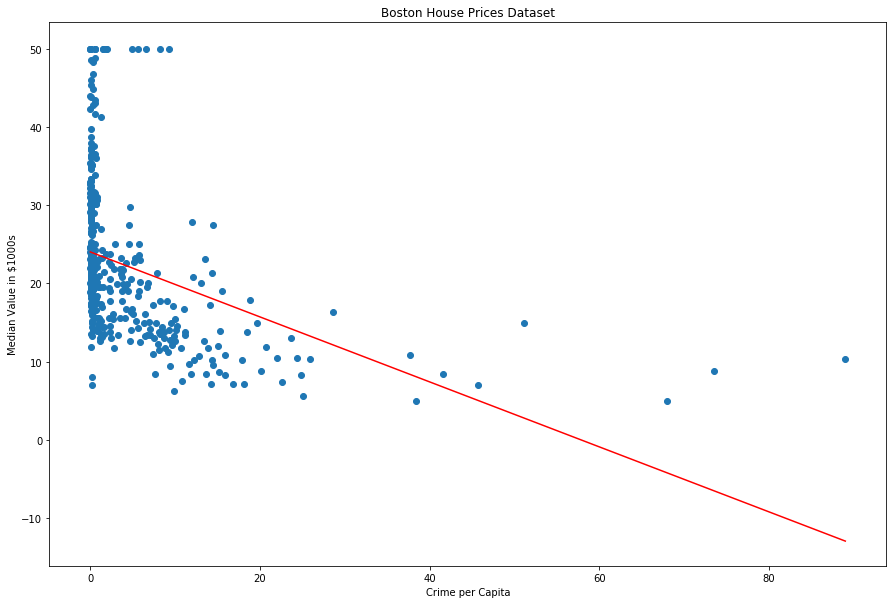

In [3]:
# define the function we want to fit
def linear(x, m, b):
    return m*x + b

# fit function to data
# the curve_fit() function returns 2 objects (READ THIS: TWO, DOS, DALAWA)
# popt - optimal values for the parameters
# pcov - estimated covariance of popt (not important right now)
popt, pcov = curve_fit(linear, x, y)

# calculate sum of squared residuals (SSR)
ssr = sum((y - linear(x, popt[0], popt[1]))**2)

# print (i.e. display) the calculated optimal values and the SSR
print('m =', popt[0])
print('b =', popt[1])
print('SSR:', ssr)

# generate an array of size 100 that covers the range of x values in equally spaced increments
# useful for plotting lines "manually"
x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, linear(x_range, popt[0], popt[1]), 'r-') ## plot the LINE (i.e. the curve we fit)
#plt.plot(x, linear(x, popt[0], popt[1]), 'g.') ## try running this line to see what the plot will look like!
plt.scatter(x, y)
plt.title("Boston House Prices Dataset")
plt.xlabel('Crime per Capita')
plt.ylabel('Median Value in $1000s')
plt.show()

### Quadratic Fitting

a = 0.008868417350663621
b = -0.8761406310839694
c = 24.92811418207643
SSR: 33751.290993264745


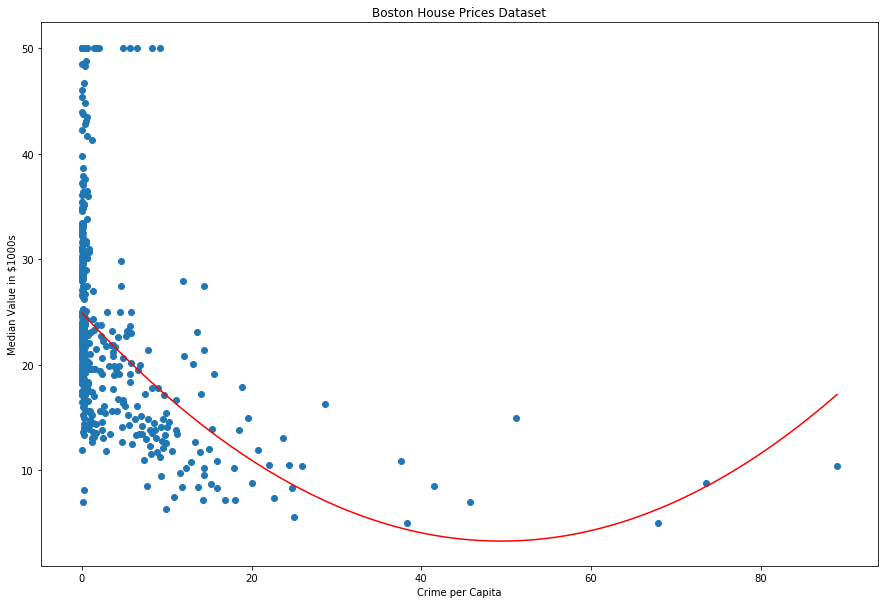

In [4]:
def quadratic(x, a, b, c):
    return (a * x * x) + (b * x) + c

popt, pcov = curve_fit(quadratic, x, y)

ssr = sum((y - quadratic(x, *popt))**2)

print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, quadratic(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("Boston House Prices Dataset")
plt.xlabel('Crime per Capita')
plt.ylabel('Median Value in $1000s')
plt.show()

### Cubic fitting

a = -0.0001488720852851213
b = 0.02378482485818423
c = -1.1364007098832083
d = 25.190479347995144
SSR: 33416.74914905215


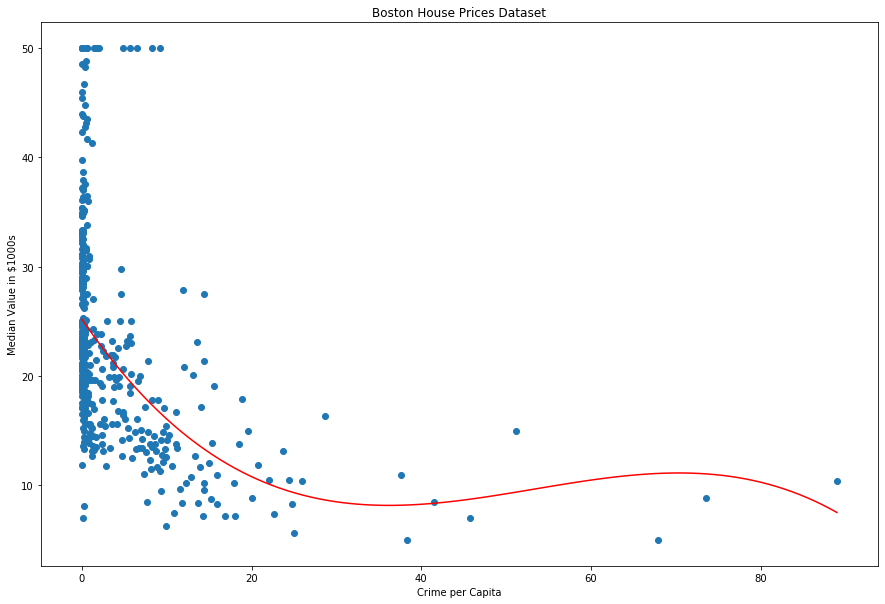

In [5]:
def cubic(x, a, b, c, d):
    return (a * x**3) + (b * x**2) + (c * x) + d

popt, pcov = curve_fit(cubic, x, y)

ssr = sum((y - cubic(x, *popt))**2)

print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
print('d =', popt[3])
print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, cubic(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("Boston House Prices Dataset")
plt.xlabel('Crime per Capita')
plt.ylabel('Median Value in $1000s')
plt.show()

### Sine Fitting

A = 1.9219986515140985
f = 0.9737473014094651
C = 1.5441089570133064
D = 21.97173408945867
SSR: 41785.10440776089


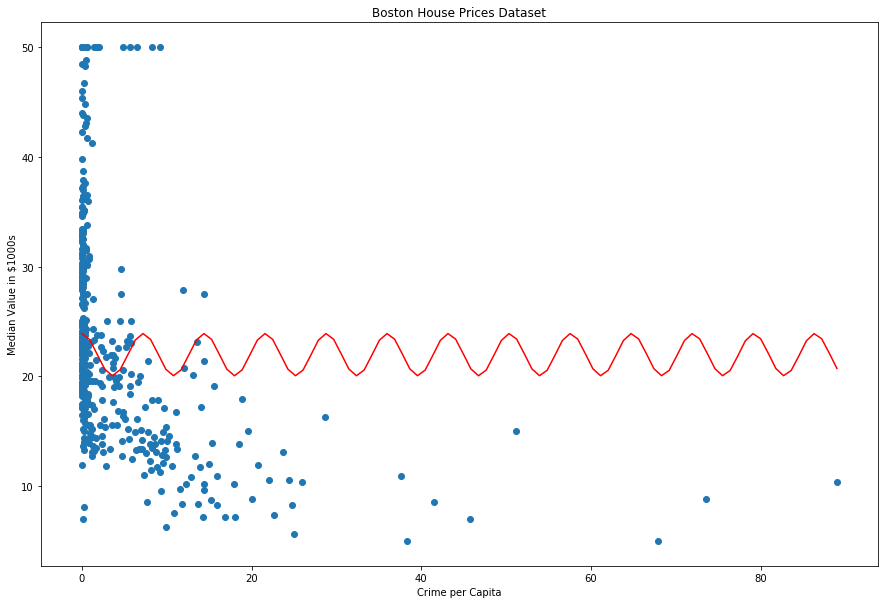

In [6]:
def sine(x, A, f, C, D):
    return A * np.sin((2 * np.pi * f * x) + C) + D 

popt, pcov = curve_fit(sine, x, y)

ssr = sum((y - sine(x, *popt))**2)

print('A =', popt[0])
print('f =', popt[1])
print('C =', popt[2])
print('D =', popt[3])
print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, sine(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("Boston House Prices Dataset")
plt.xlabel('Crime per Capita')
plt.ylabel('Median Value in $1000s')
plt.show()

### Exponential Fitting

c:\users\basti\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


A = 25.109287141160415
b = 0.042052362508888906
SSR: 33743.34834799408


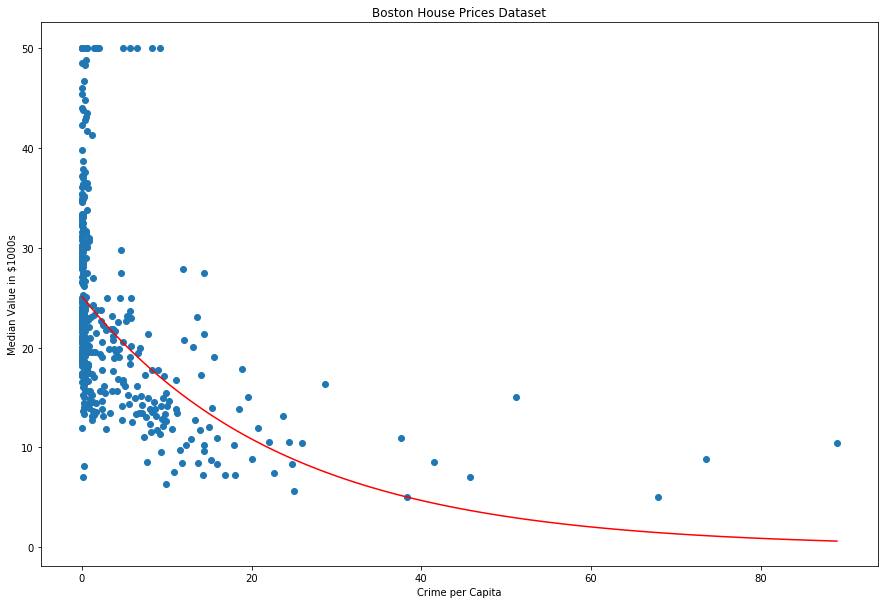

In [7]:
def exponential(x, A, b):
    return A * np.exp(-b * x) #-b because it can be seen in the graph that it has a decaying trend
    
popt, pcov = curve_fit(exponential, x, y) #add p0=[1,1e-6]in the argument to remove the "overflow warning below"
#popt, pcov = curve_fit(exponential, x, y, p0 = [1, 1e-6]) ## no overflow warning but we get the same answer anyway

ssr = sum((y - exponential(x, *popt))**2)

print('A =', popt[0])
print('b =', popt[1])
print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, exponential(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("Boston House Prices Dataset")
plt.xlabel('Crime per Capita')
plt.ylabel('Median Value in $1000s')
plt.show()

### Power Law Fitting

A = 20.742641805253793
alpha = 0.08564380693930848
SSR: 34230.29782623768


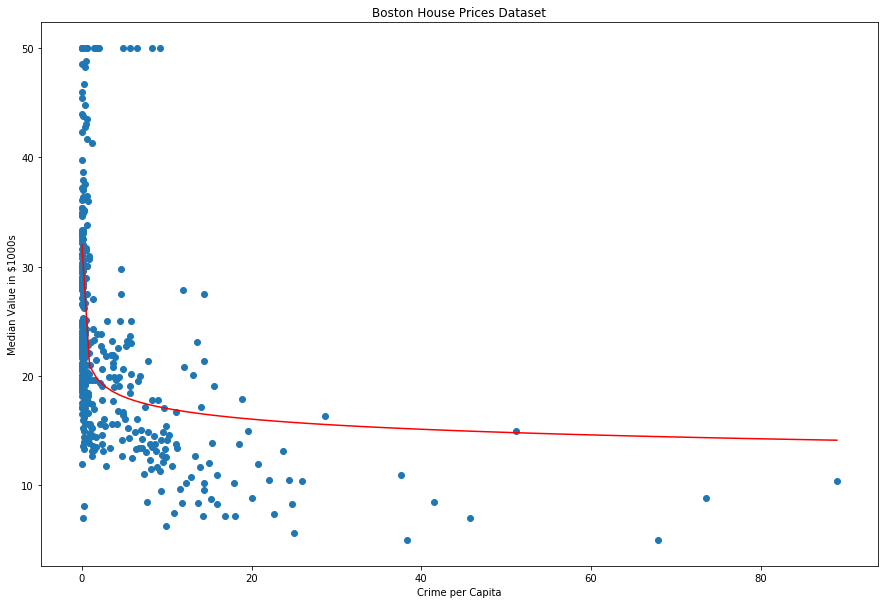

In [8]:
def powerlaw(x, A, alpha):
    return A * (np.power(x, -alpha))

popt, pcov = curve_fit(powerlaw, x, y)

ssr = sum((y - powerlaw(x, *popt))**2)

print('A =', popt[0])
print('alpha =', popt[1])
print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, powerlaw(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("Boston House Prices Dataset")
plt.xlabel('Crime per Capita')
plt.ylabel('Median Value in $1000s')
plt.show()

### Combo Fitting

SSR: 32192.999546084597


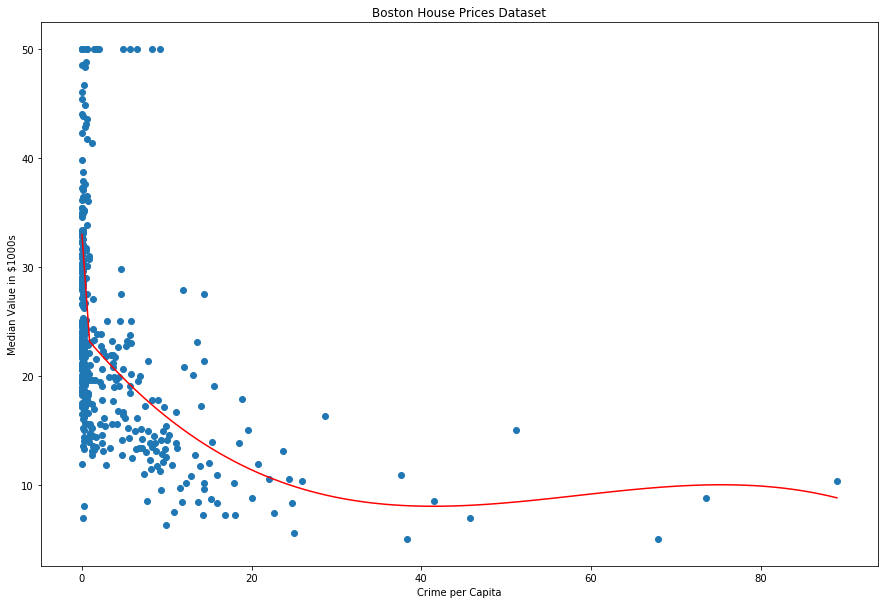

In [9]:
def combo1(x, a, b, c, d, e, f):
    return a * np.exp(-b * x)  + (c * x**3) + (d * x**2) + (e * x) + f

popt, pcov = curve_fit(combo1, x, y)

ssr = sum((y - combo1(x, *popt))**2)

print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, combo1(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("Boston House Prices Dataset")
plt.xlabel('Crime per Capita')
plt.ylabel('Median Value in $1000s')
plt.show()

SSR: 35645.26203598605


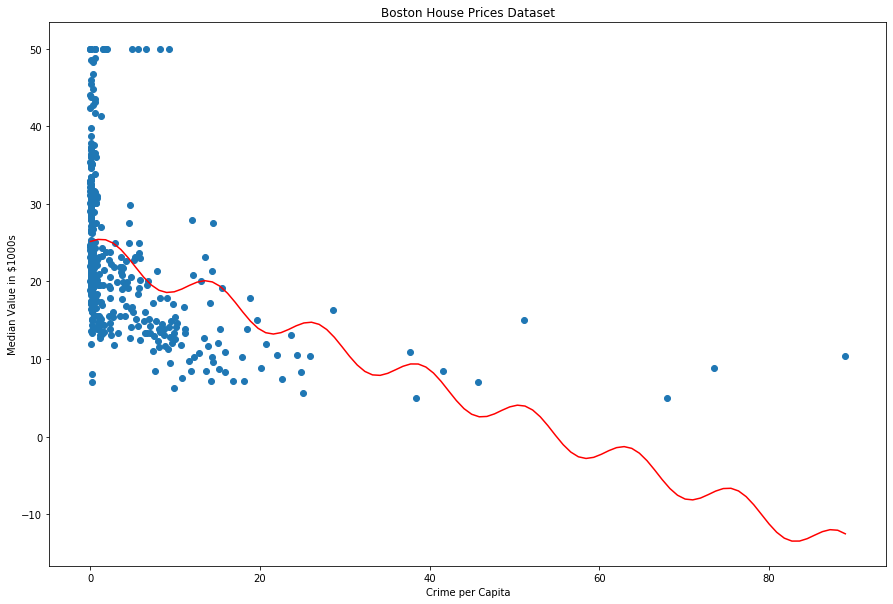

In [10]:
def combo2(x, A, f, C, D, E):
    return A * np.sin((2 * np.pi * f * x) + C) + D*x + E

popt, pcov = curve_fit(combo2, x, y)

ssr = sum((y - combo2(x, *popt))**2)

print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, combo2(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("Boston House Prices Dataset")
plt.xlabel('Crime per Capita')
plt.ylabel('Median Value in $1000s')
plt.show()

Optimal Parameters: [-2.53075434  0.10572684  0.95907626  6.50175006 17.53657762  9.22337158]
SSR: 32386.874479097238


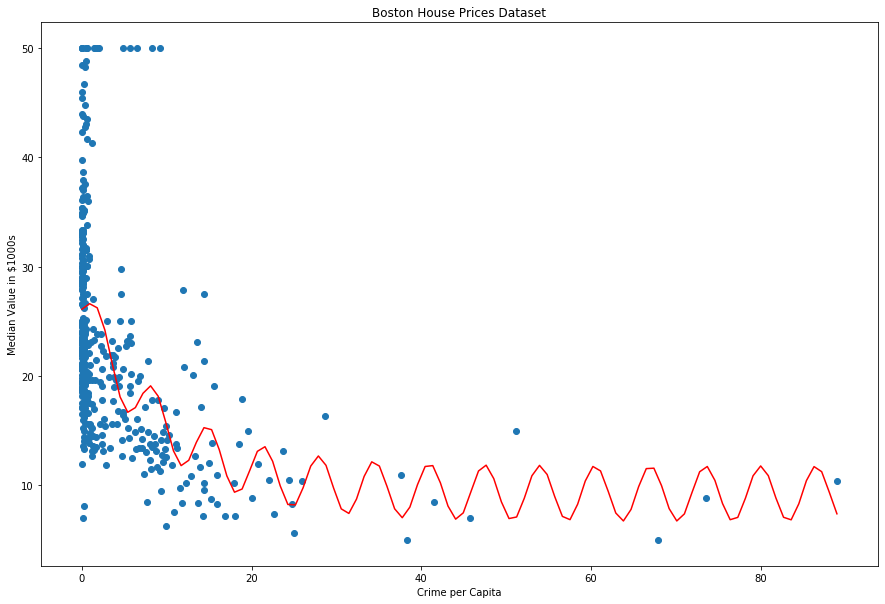

In [11]:
def combo3(x, A, b, f, C, D, E):
    return A * np.sin((2 * np.pi * f * x) + C) + D * np.exp(-b * x) + E

popt, pcov = curve_fit(combo3, x, y)

ssr = sum((y - combo3(x, *popt))**2)

print('Optimal Parameters:', popt)
print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, combo3(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("Boston House Prices Dataset")
plt.xlabel('Crime per Capita')
plt.ylabel('Median Value in $1000s')
plt.show()

---
### Gaussian Fitting

There are certain things to keep in mind when fitting a Gaussian function to data:

1) The variable $x$ should be univariate

2) The Gaussian function should be fit on the histogram of $x$

See the following example:

              x         y
0      65.78331  112.9925
1      71.51521  136.4873
2      69.39874  153.0269
3      68.21660  142.3354
4      67.78781  144.2971
...         ...       ...
24995  69.50215  118.0312
24996  64.54826  120.1932
24997  64.69855  118.2655
24998  67.52918  132.2682
24999  68.87761  124.8742

[25000 rows x 2 columns]


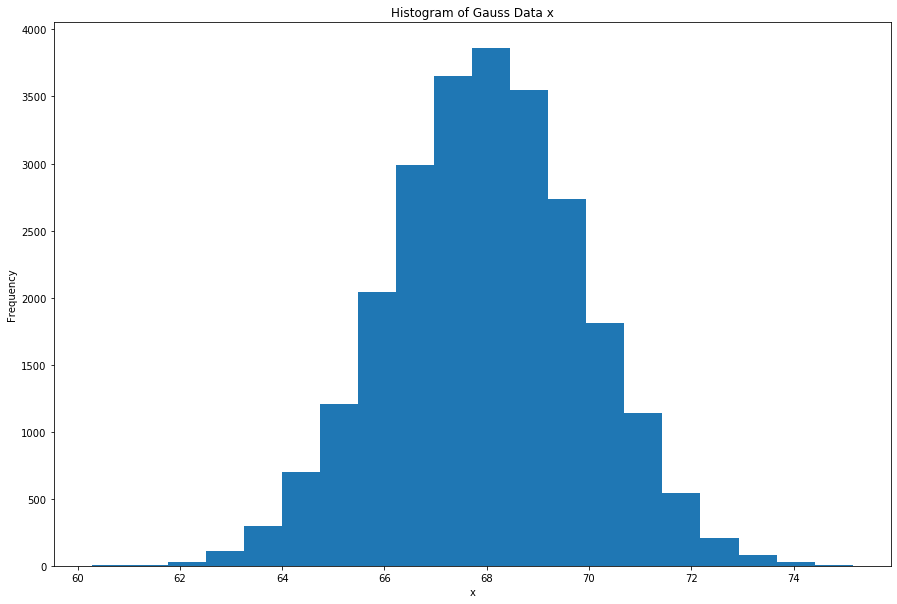

In [12]:
df_gauss = pd.read_csv('Gauss.csv')

print(df_gauss)

x = df_gauss['x']
y = df_gauss['y']

x = x.to_numpy()
y = y.to_numpy()

# We will only focus on the x variable!
plt.hist(x, bins = 20) ## Plot a histogram with 20 bins
plt.title("Histogram of Gauss Data x")
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

mean = 67.9931135968
stdev = 1.9016407372498432
SSR: 499.95054096716854


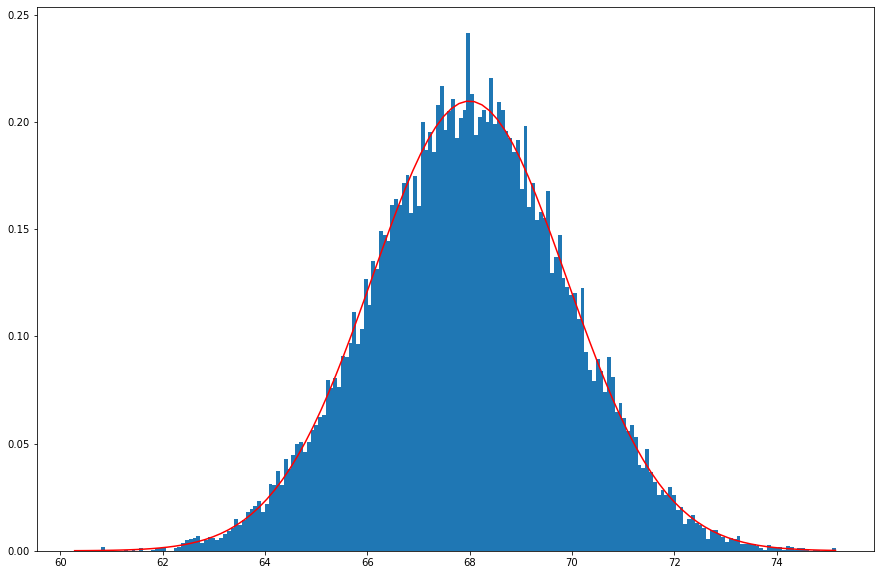

In [13]:
def gaussian(x, mean, stdev):
    return (1/np.sqrt(2 * np.pi * stdev**2)) * np.exp(-(x - mean)**2 / (2*stdev**2))

# Calculate the mean and standard deviation of our data
mean = np.mean(x)
stdev = np.std(x)

# See https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
ssr = sum((np.histogram(x, bins = len(x), density = True)[0] - gaussian(x, mean, stdev))**2)

print('mean =', mean)
print('stdev =', stdev)
print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, gaussian(x_range, mean, stdev), 'r-')
plt.hist(x, bins = 200, density = True) ## We set density = True so that the scale of the two plots will match
plt.show()

### Sigmoid Fitting

<div class="alert alert-block alert-info">

**Video**: Check out this COOL video by [`3Blue1Brown`](https://www.youtube.com/watch?v=Kas0tIxDvrg) on exponential and sigmoid (logistic curve) fitting to COVID-19 data.

</div>

When fitting a sigmoid function to data, keep in mind that these types of functions are S-shaped and are asymptotic to some y-values. This means that as $x$ goes to infinity (negative infinity), $y$ approaches some upper (lower) bound.

See the following example:

In [14]:
df_pop = pd.read_csv('Population.csv') ## Population of England and Wales from 1700 to 2001

print(df_pop)

    year  population
0   1700       5.835
1   1710       6.013
2   1720       6.048
3   1730       6.008
4   1740       6.013
5   1750       6.253
6   1760       6.665
7   1770       7.124
8   1780       7.581
9   1790       8.216
10  1800       9.168
11  1811      10.164
12  1821      12.000
13  1831      13.896
14  1841      15.914
15  1851      17.928
16  1861      20.066
17  1871      22.712
18  1881      25.974
19  1891      29.003
20  1901      32.612
21  1911      36.136
22  1921      37.932
23  1931      39.988
24  1941      41.748
25  1951      43.815
26  1961      46.196
27  1971      49.152
28  1981      49.634
29  1991      51.099
30  2001      52.085


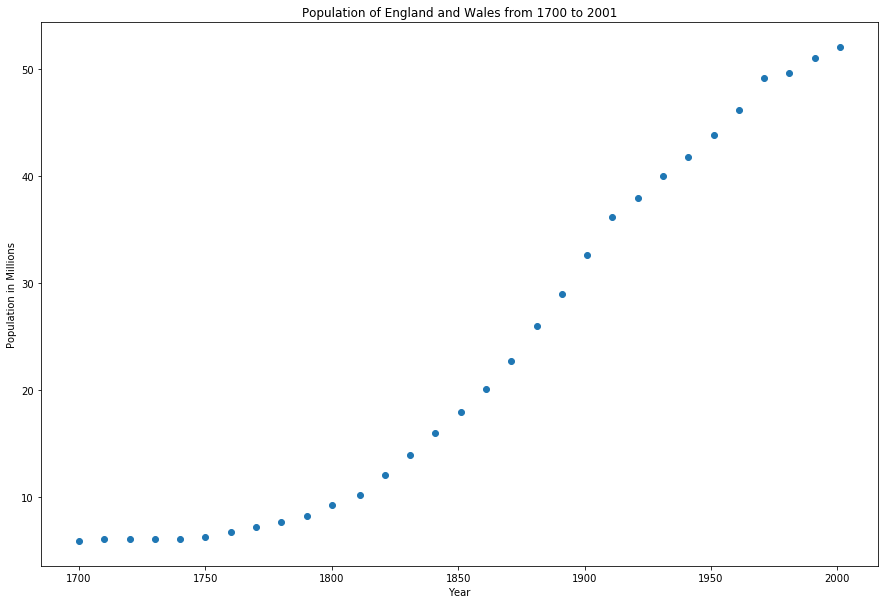

In [15]:
plt.scatter(df_pop['year'], df_pop['population'])
plt.title("Population of England and Wales from 1700 to 2001")
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.show()

A = 65.30877320584202
k = 0.15886863061375076
x0 = 20.50374681267158
SSR: 66.96639495141623


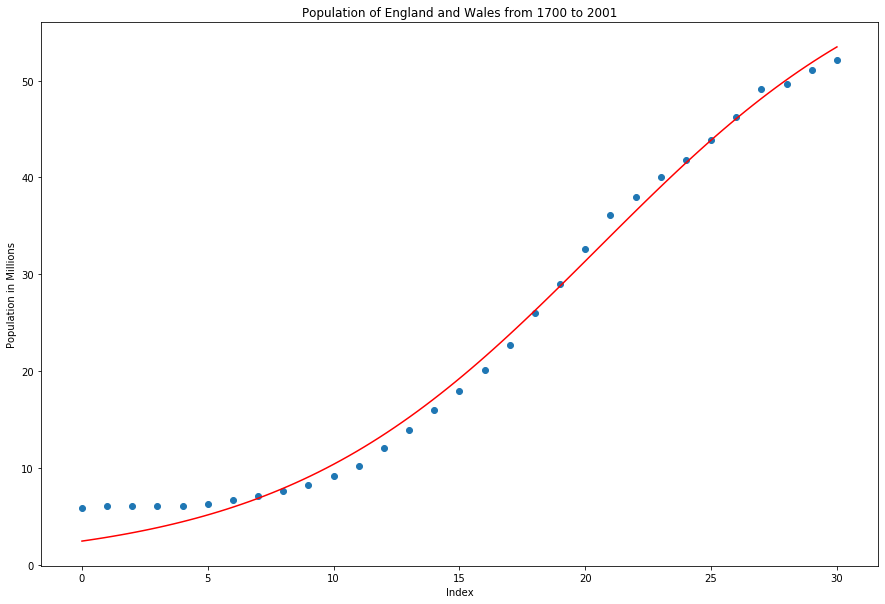

In [16]:
def logistic(x, A, k, x0):
    return A/(1 + np.exp(-k * (x - x0)))

# When fitting, dont use the actual date/year as 'x'. Instead create an index variable x = 0, 1, 2, 3, ...
y = df_pop['population']
x = range(0, len(y))

popt, pcov = curve_fit(logistic, x, y, p0 = [50, 1, 1]) ## Initialize a closer A parameter to avoid warning, p0 = [50, 1, 1]

ssr = sum((y - logistic(x, *popt))**2)

print('A =', popt[0])
print('k =', popt[1])
print('x0 =', popt[2])
print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, logistic(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("Population of England and Wales from 1700 to 2001")
plt.xlabel('Index')
plt.ylabel('Population in Millions')
plt.show()